# OCR | Natural's scenery (Outliers)

- *Examples to use OCR on natural's scenery and different images*

In [199]:
import re 
import pytesseract
from pytesseract import Output
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

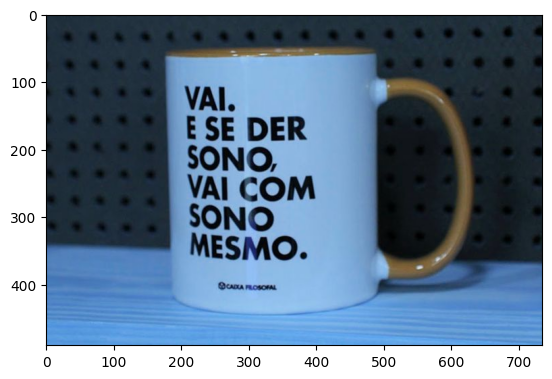

In [200]:
img = cv2.imread('text-recognize/Imagens/Aula4-caneca2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
font = 'text-recognize/Imagens/calibri.ttf'

plt.imshow(img)

In [201]:

# Utilizando PSM 6 para blocos de caracteres (analisando e supondo que seja o da imagem)
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata --psm 6' 

result = pytesseract.image_to_data(rgb, output_type=Output.DICT, config=config_tesseract, lang='por')

# Definindo o conf com base no menor valor analisado no "result"
min_conf = 30

print(result)

{'level': [1, 2, 3, 4, 5, 3, 4, 5, 5, 5, 3, 4, 5, 3, 4, 5, 5, 3, 4, 5, 3, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6], 'line_num': [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2], 'left': [0, 188, 188, 188, 188, 209, 209, 209, 237, 299, 210, 210, 210, 210, 210, 210, 287, 213, 213, 213, 214, 263, 263, 575], 'top': [0, 103, 103, 103, 103, 151, 151, 151, 152, 152, 194, 194, 194, 237, 237, 237, 240, 280, 280, 280, 324, 324, 324, 371], 'width': [735, 440, 399, 399, 92, 177, 177, 13, 42, 87, 132, 132, 132, 189, 189, 59, 112, 124, 124, 124, 414, 365, 110, 53], 'height': [490, 305, 56, 56, 56, 37, 37, 35, 36, 36, 40, 40, 40, 41, 41, 39, 38, 42, 42, 42, 84, 84, 84, 2

In [202]:
def textBox(result, img, color=(255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

    return x, y, img

In [203]:
def drawText(text, x, y, img, font, size=20):
    font = ImageFont.truetype(font, size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - size), text, font=font)
    img = np.array(img_pil)

    return img

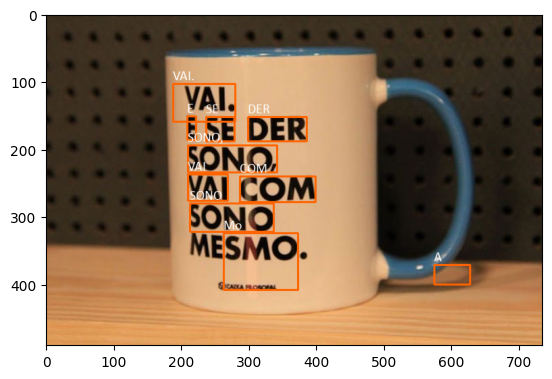

In [204]:
copy_img = rgb.copy()

for i in range(len(result['text'])):
    if int(result['conf'][i]) > min_conf:
        x, y, img = textBox(result, copy_img)
        text = result['text'][i]
        copy_img = drawText(text, x, y, copy_img, font)

plt.imshow(copy_img)


# Semelhante aos modelos de machine learning convencionais temos as métricas que podem ser utilizadas após a montagem da matriz de confusão e nos auxiliam a entender melhor sobre como nosso modelo está performando.

Dentro da nossa matriz de confusão ainda continuamos com os mesmos campos, de verdadeiros e falsos que podem ser positivos ou negativos, gerando nossas quatro categorias:

-    Verdadeiro Positivo (VP): É quando o modelo categoriza corretamente uma imagem. Por exemplo, categorizar uma imagem de um gato como um gato.
-   Falso Positivo (FP): Quando o modelo categoriza uma imagem quando não deveria. Por exemplo, categorizar uma imagem de um gato como um cachorro.
-   Verdadeiro Negativo (VN): Ocasião na qual o modelo não categoriza corretamente uma imagem. Por exemplo, não categorizar uma imagem de um gato como um cachorro.
-   Falso Negativo (FN): É quando o modelo não categoriza uma imagem, mas deveria. Por exemplo, não categorizar uma imagem de um gato como gato.

Um destaque especial é dado para os valores de Falsos Positivos (FP) que ocorrem quando a imagem tem mais classificações do que deveria, apresentando caixas a mais em lugares onde o objeto ou o texto não se encontra, que foi o caso da aula de Falsos Positivos.

Após termos os valores de VP, FP, VN e FN podemos medir a performance do nosso modelo com algumas métricas, como a Acurácia, Precisão e Recall (ou Sensibilidade - em português).

Sendo assim, temos que cada um destes itens significam, respectivamente:

    Acurácia: avalia a proporção de acertos em relação a todas as previsões realizadas. É obtida pelo quociente da soma dos valores de verdadeiros positivos e negativos por todos os outros valores previstos (VP, VN, FP, FN).

    Precisão: avalia a proporção de verdadeiros positivos dentre as predições dadas como positivas pelo modelo. É obtida dividindo os verdadeiros positivos pela soma das previsões positivas.

    Recall | Sensibilidade: avalia a proporção de verdadeiros positivos dentre todos os valores positivos reais. É obtida dividindo os verdadeiros positivos pela soma de positivos reais.

Além disso, outras métricas, tais como Taxa de Verdadeiros Positivos (TVP) e a Taxa de Falsos Positivos (TFP) também podem ser calculadas com base nos valores obtidos da matriz de confusão. Com os valores de TVP e TFP é possível fazer o gráfico utilizado para avaliar modelos de classificação, chamado de curva ROC



# **False positive**

In [205]:
result['text'] 

['',
 '',
 '',
 '',
 'VAI.',
 '',
 '',
 'E',
 'SE',
 'DER',
 '',
 '',
 'SONO,',
 '',
 '',
 'VAI',
 'COM',
 '',
 '',
 'SONO',
 '',
 '',
 'Mo',
 'A']

# **Removing words with only 1 character to eliminate false positives**

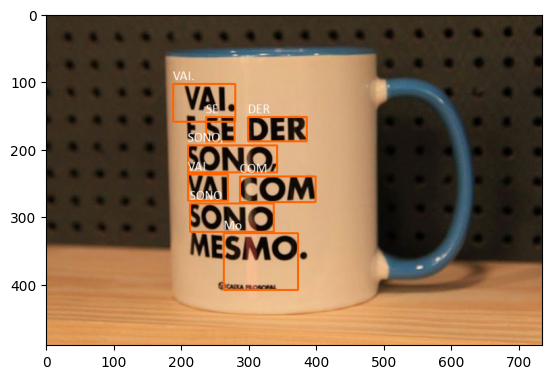

In [206]:
img_copia = rgb.copy()

for i in range(0, len(result['text'])):
  confianca = int(result['conf'][i])

  if confianca > min_conf:
    texto = result['text'][i]
    if not texto.isspace() and len(texto) > 1:
      x, y, img = textBox(result, img_copia)
      img_copia = drawText(texto, x, y, img_copia, font)

plt.imshow(img_copia)


# **TOPICS**

-   Utilizar o Regex como aliado na procura de palavras e termos em imagens;
-   Destacar termos importantes e/ou diferentes de outros que estamos procurando;
-   Diferenciar o que é uma imagem em cenário natural e imagem em cenário controlado;
-   Discernir o que são falsos positivos em imagens e alternativas de tratamento destes casos.